In [1]:
#NEW DOCUMNET USE THIS NOT THE OTHER ONE 

In [2]:
#importing stuff
from astropy.table import Table, join, unique, QTable
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.colors as colors
from matplotlib.ticker import MultipleLocator, FixedLocator, FormatStrFormatter
%matplotlib inline 

import h5py

In [3]:
#reading files using Table.read function in astropy.table
data_summary_6811 = Table.read("/users/EllaMathews/Research/summary_ngc6811.csv")
data_xmatch_6811 = Table.read("/users/EllaMathews/Research/summary_ngc6811_xmatch_gaiadr3.csv")

In [4]:
#data_xmatch_6811.info
#data_summary_6811.info

In [5]:
#isolating the columns that is needed in the output table 
data_xmatch_6811.sort(keys = 'angDist')
data_gaia_6811_columnsneeded = unique(data_xmatch_6811['angDist','id', 'RAdeg', 'e_RAdeg', 'DEdeg', 'e_DEdeg', 'DR3Name'],keys='id')
data_gaia_6811_columnsneeded.sort(keys = ['id', 'angDist'])
data_gaia_6811_columnsneeded2 = unique(data_gaia_6811_columnsneeded['angDist','id', 'RAdeg', 'e_RAdeg', 'DEdeg', 'e_DEdeg', 'DR3Name'],keys='DR3Name')

In [6]:
#using join function to crossmatch the two tables
combined_table = join(data_summary_6811, data_gaia_6811_columnsneeded2, keys='id', join_type ='right')
combined_table_wantedcolumns= combined_table['angDist', 'date', 'fwhm', 'id', 'hjd', 'ra', 'dec','v', 'bv', 'teff', 'feh', 'feh_err', 'logg', 'logg_err', 'rv', 'rve','vsini', 'vsini_err','RAdeg', 'e_RAdeg', 'DEdeg', 'e_DEdeg', 'DR3Name']

In [7]:
#combined_table.info

In [8]:
combined_table_wantedcolumns.write('Combined_Data_6811.csv', format ='csv', overwrite = True)

In [9]:
#using unique function to get the first instance of each id 
unique_ids = unique(data_xmatch_6811, keys = 'id') #do this for just xmatch data add v and bv from summary table 
unique_ids.sort(keys = ['id', 'angDist'])
unique_ids2 = unique(unique_ids, keys = 'DR3Name')

In [10]:
unique_kic_id = unique(data_summary_6811['id', 'v', 'bv'], keys = 'id')

In [11]:
unique_ids_combined = join(unique_ids2, unique_kic_id)

In [12]:
#using numpy unique function to get the values of the unique ids and how many times they appear 
values, counts = np.unique(unique_ids_combined['id'], return_counts=True)

In [13]:
#seeing where the unique values appear more than once 
duplicates = counts > 1

In [14]:
#using the location of the duplicated unique values to find which ids are duplicated 
duplicated_ids=values[np.where(duplicates)]

In [15]:
len(unique_ids_combined)

3422

In [16]:
len(duplicated_ids)

0

In [17]:
unique_ids_combined.write('Combined_Data_Unique_6811.csv', format = 'csv', overwrite = True)

In [18]:
#function that plots V vs B-V as long as the input has columns labled bv and v
def VvsBV(tbl):
    fig, ax = plt.subplots()
    ax.plot(tbl['bv'], tbl['v'], '.', alpha = 0.25)
    ax.set_xlabel('B-V')
    ax.set_ylabel('V')
    ax.tick_params(axis='both', direction='in', length=6, top=True, right=True)
    XminorLocator = MultipleLocator(0.05)
    YminorLocator = MultipleLocator(0.5)
    ax.xaxis.set_minor_locator(XminorLocator)
    ax.yaxis.set_minor_locator(YminorLocator)
    ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)
    ax.invert_yaxis()
    plt.show();
    

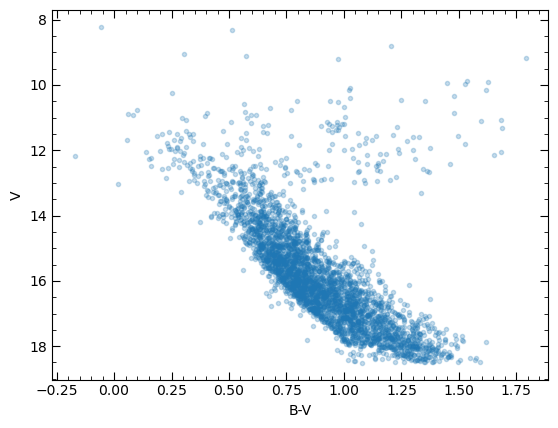

In [19]:
#trying out the function with the 6811 data from above
VvsBV(unique_ids_combined)

In [20]:
#function that plots G vs BP-RP
def GvsBPRP(tbl):
    fig, ax = plt.subplots()
    ax.plot(tbl['BP-RP'], tbl['Gmag'], '.', alpha = 0.25)
    ax.set_xlabel('BP-RP')
    ax.set_ylabel('Gmag')
    ax.tick_params(axis='both', direction='in', length=6, top=True, right=True)
    XminorLocator = MultipleLocator(0.25)
    YminorLocator = MultipleLocator(0.5)
    ax.xaxis.set_minor_locator(XminorLocator)
    ax.yaxis.set_minor_locator(YminorLocator)
    ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)
    ax.invert_yaxis() #flip y axis
    plt.show();

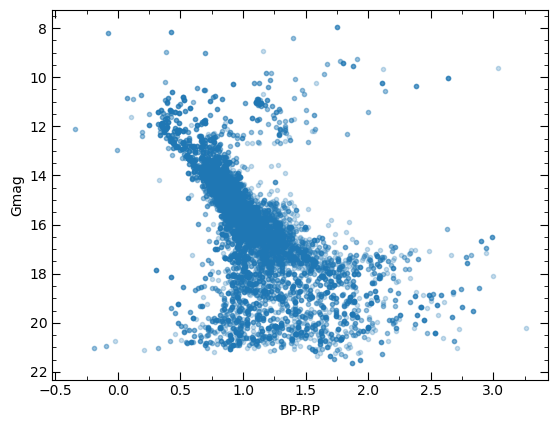

In [21]:
GvsBPRP(data_xmatch_6811)

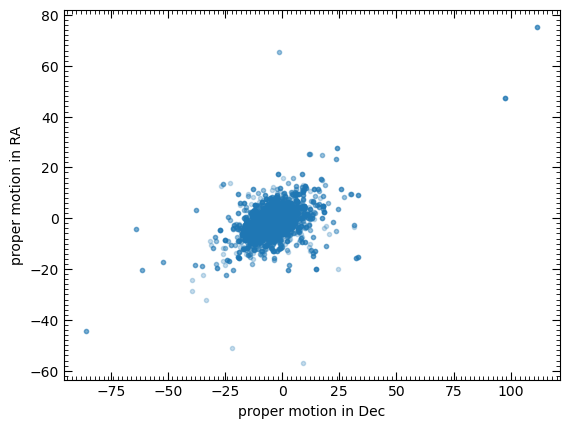

In [22]:
#plot proper motion in Ra vs proper motion in Dec 
fig, ax = plt.subplots()
ax.plot(data_xmatch_6811['pmDE'], data_xmatch_6811['pmRA'], '.', alpha = 0.25)
ax.set_xlabel('proper motion in Dec')
ax.set_ylabel('proper motion in RA')
ax.tick_params(axis='both', direction='in', length=6, top=True, right=True)
XminorLocator = MultipleLocator(2)
YminorLocator = MultipleLocator(2)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)

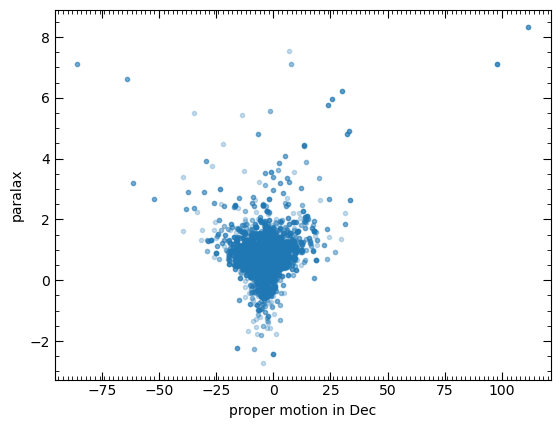

In [23]:
#plot paralax vs proper motion in Dec
fig, ax = plt.subplots()
ax.plot(data_xmatch_6811['pmDE'], data_xmatch_6811['Plx'], '.', alpha = 0.25)
ax.set_xlabel('proper motion in Dec')
ax.set_ylabel('paralax')
ax.tick_params(axis='both', direction='in', length=6, top=True, right=True)
XminorLocator = MultipleLocator(2)
YminorLocator = MultipleLocator(.5)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)

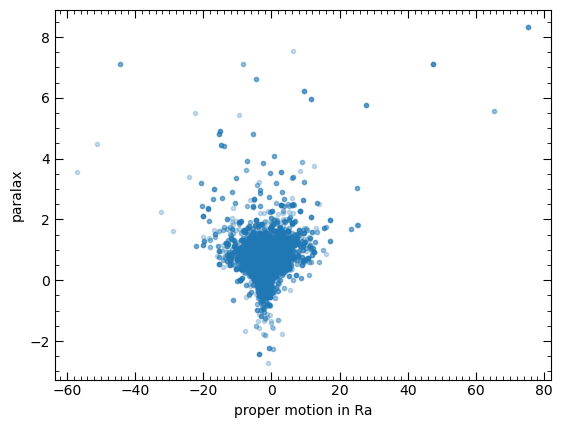

In [24]:
#plot paralax vs proper motion in RA
fig, ax = plt.subplots()
ax.plot(data_xmatch_6811['pmRA'], data_xmatch_6811['Plx'], '.', alpha = 0.25)
ax.set_xlabel('proper motion in Ra')
ax.set_ylabel('paralax')
ax.tick_params(axis='both', direction='in', length=6, top=True, right=True)
XminorLocator = MultipleLocator(2)
YminorLocator = MultipleLocator(.5)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)

In [25]:
#importing new data
data = h5py.File('/users/EllaMathews/Research/ngc6811_UTP_v1_new.h5', 'r')

In [26]:
membool = data['catalog']['MemBool'] #if 0 not in cluster if 1 in cluster

In [27]:
inCluster = data['catalog']['GAIAEDR3_ID'][membool == 1]

In [28]:
len(inCluster)

260

In [29]:
#data['catalog'].dtype

In [30]:
bprp = data['catalog']['GAIAEDR3_BP'] - data['catalog']['GAIAEDR3_RP']

Text(0, 0.5, 'G')

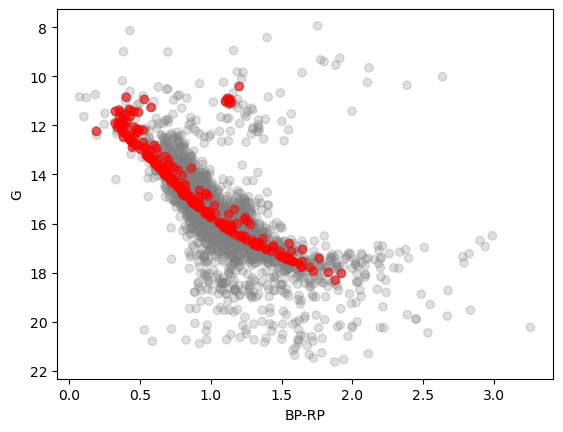

In [31]:
fig, ax = plt.subplots()
x = bprp
y = data['catalog']['GAIAEDR3_G']
plt.scatter(x, y, c='gray', alpha = (membool+1)*.25)
plt.scatter(x[membool==1], y[membool==1], c='red', alpha = .5)
ax.invert_yaxis()
ax.set_xlabel('BP-RP')
ax.set_ylabel('G')

Text(0, 0.5, 'G')

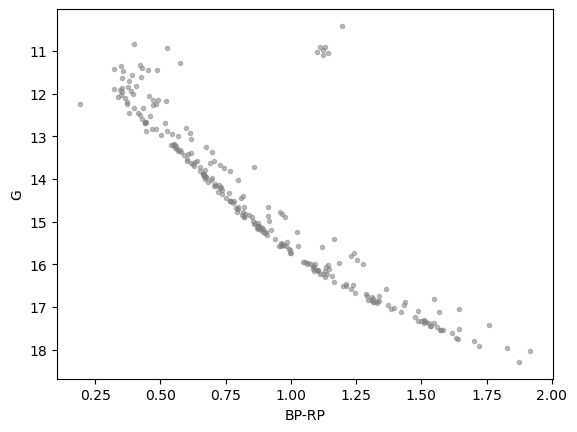

In [32]:
fig, ax = plt.subplots()
ax.scatter(x[membool == 1], y[membool == 1], alpha = .5, marker ='.', color = 'gray')
ax.invert_yaxis()
ax.set_xlabel('BP-RP')
ax.set_ylabel('G')

In [33]:
#add another plot over this one with the data that we have rvs for 

In [34]:
dr3names = combined_table_wantedcolumns['DR3Name']
dr3nums = []
for name in dr3names:
    num = np.int64(name[9:])
    dr3nums.append(num)

In [35]:
values2 = np.unique(combined_table_wantedcolumns['DR3Name'])

In [36]:
values3 = []
for name in values2:
    num = np.int64(name[9:])
    values3.append(num)

In [37]:
checkvalues = []
checkvalues2 = []
counts3 = []
for num in inCluster:
    if num in values3:
        checkvalues.append(True)
        checkvalues2.append(False)
        count = dr3nums.count(num)
        counts3.append(count)
    else:
        checkvalues.append(False)
        checkvalues2.append(True)


In [38]:
xcluster = x[membool == 1]
ycluster = y[membool == 1]

Text(0, 0.5, 'G')

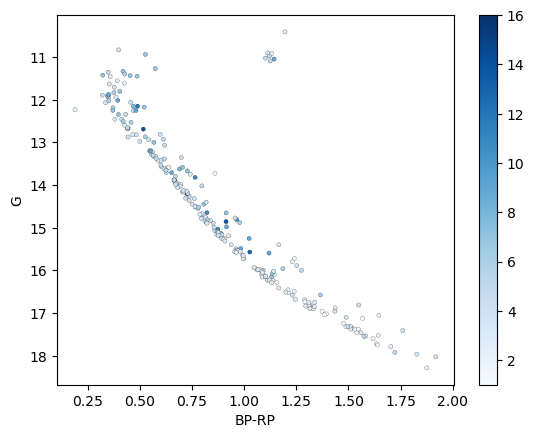

In [39]:
fig, ax = plt.subplots()
#plt.scatter(xcluster, ycluster, alpha = .5, marker ='.', color = 'gray')
scatter = plt.scatter(xcluster[checkvalues], ycluster[checkvalues], marker = '.', c=counts3, cmap = 'Blues', edgecolors = 'black', linewidths = 0.15)
#add legend of what colors mean
plt.colorbar(scatter)
#legend1 = ax.legend(*scatter.legend_elements(num=16),
                   # loc=0, title="# of Points")
ax.invert_yaxis()
ax.set_xlabel('BP-RP')
ax.set_ylabel('G')

In [40]:
print(counts3)

[5, 1, 12, 4, 5, 1, 5, 8, 5, 3, 7, 6, 4, 7, 4, 5, 3, 2, 5, 2, 1, 2, 3, 3, 6, 6, 7, 3, 3, 6, 7, 5, 4, 3, 3, 2, 14, 3, 8, 5, 4, 9, 5, 4, 5, 5, 4, 2, 10, 4, 14, 5, 11, 3, 3, 9, 3, 3, 3, 4, 3, 4, 3, 2, 3, 3, 2, 3, 2, 6, 2, 1, 1, 3, 9, 9, 4, 7, 6, 7, 3, 5, 3, 4, 4, 4, 2, 9, 4, 3, 2, 3, 4, 3, 2, 5, 4, 4, 5, 7, 3, 4, 5, 16, 5, 4, 6, 4, 4, 3, 2, 3, 4, 5, 5, 3, 4, 3, 4, 6, 5, 4, 1, 1, 3, 3, 4, 3, 3, 3, 1, 2, 3, 1, 7, 2, 3, 4, 6, 3, 3, 1, 2, 4, 4, 7, 4, 4, 4, 7, 4, 9, 4, 6, 4, 3, 9, 6, 9, 2, 3, 2, 4, 3, 5, 2, 5, 7, 9, 4, 5, 5, 5, 3, 4, 5, 7, 4, 4, 4, 4, 3, 3, 3, 7, 6, 3, 3, 5, 3, 3, 4, 3, 3, 7, 5, 3, 4, 4, 13, 3, 4, 8, 3, 5, 6, 6, 4, 3, 5, 9, 3, 3, 5, 4, 7, 7, 3, 5, 2, 3, 3, 1, 4, 3, 4, 9, 3, 3, 3, 3, 1, 3, 11, 8, 3, 1, 4, 4, 1, 5, 3, 11, 3, 3, 2, 1, 7, 3, 5, 4, 2, 2, 4]


In [41]:
combined_table_wantedcolumns.info

<Table length=8155>
   name    dtype 
--------- -------
  angDist float64
     date   int64
     fwhm float64
       id   int64
      hjd float64
       ra float64
      dec float64
        v float64
       bv float64
     teff   int64
      feh float64
  feh_err float64
     logg float64
 logg_err float64
       rv float64
      rve float64
    vsini float64
vsini_err float64
    RAdeg float64
  e_RAdeg float64
    DEdeg float64
  e_DEdeg float64
  DR3Name   str28

Text(0, 0.5, 'G')

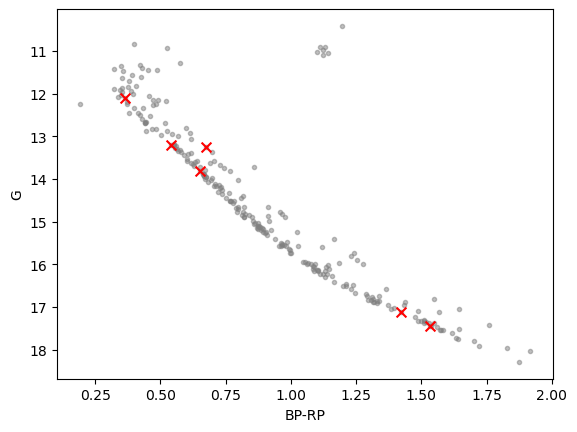

In [42]:
fig, ax = plt.subplots()
#ax.scatter(x, y, marker ='.', color = 'gray') #all in the catalog 
plt.scatter(xcluster, ycluster, marker = '.', c = 'grey', alpha = 0.5) #in the catalog and in the cluster
plt.scatter(xcluster[checkvalues2], ycluster[checkvalues2], marker = 'x', c = 'red', s=50) #in the catalog and in the cluster and do not have data for 

ax.invert_yaxis()
ax.set_xlabel('BP-RP')
ax.set_ylabel('G')

In [43]:
#importing new data for new vs old comparison 

In [44]:
#importing new data
new_6811 = QTable.read("/users/EllaMathews/Research/rcat_ngc6811_v0.fits")
membership = new_6811['MemBool']

In [45]:
new_names_all = new_6811['GAIAEDR3_ID']
new_names_incluster = new_names_all[membership==1]

In [46]:
new_Teff_all = new_6811['Teff']
new_Teff_incluster = new_Teff_all[membership ==1]
new_Teff_err_all = new_6811['Teff_err']
new_Teff_err_incluster = new_Teff_err_all[membership==1]

In [47]:
new_logg_all = new_6811['log(g)']
new_logg_incluster = new_logg_all[membership ==1]
new_logg_err_all = new_6811['log(g)_err']
new_logg_err_incluster = new_logg_err_all[membership ==1]

In [48]:
new_feh_all = new_6811['[Fe/H]']
new_feh_err_all = new_6811['[Fe/H]_err']
new_feh_incluster = new_feh_all[membership==1]
new_feh_err_incluster = new_feh_err_all[membership==1]

In [49]:
new_rv_all = new_6811['vrad']
new_rv_err_all = new_6811['vrad_err']
new_rv_incluster = new_rv_all[membership==1]
new_rv_err_incluster = new_rv_err_all[membership==1]

In [50]:
new_obs_date_all = new_6811['DATE-OBS']
new_obs_date_incluster = new_obs_date_all[membership==1]

In [51]:
new_specjitter_all = new_6811['specjitter']
new_specjitter_incluster = new_specjitter_all[membership==1]

In [52]:
new_lsf_all = new_6811['lsf']
new_lsf_incluster = new_lsf_all[membership==1]

In [53]:
new_SNR_all = new_6811['SNR']
new_SNR_incluster = new_SNR_all[membership==1]

In [54]:
new_catalog = Table()

In [55]:
new_catalog['DR3_ID']= new_names_incluster
new_catalog['Teff_new'] = new_Teff_incluster
new_catalog['Teff_err_new'] = new_Teff_err_incluster
new_catalog['logg_new'] = new_logg_incluster
new_catalog['logg_err_new'] = new_logg_err_incluster
new_catalog['[Fe/H]_new'] = new_feh_incluster
new_catalog['[Fe/H]_err_new'] = new_feh_err_incluster
new_catalog['RV_new'] = new_rv_incluster
new_catalog['RV_err_new'] = new_rv_err_incluster
new_catalog['specjitter'] = new_specjitter_incluster
new_catalog['lsf'] = new_lsf_incluster
new_catalog['SNR'] = new_SNR_incluster

In [56]:
old_data = Table()
old_names =[]

In [57]:
for name in combined_table_wantedcolumns['DR3Name']:
    num = np.int64(name[9:])
    old_names.append(num)

In [58]:
old_data['DR3_ID'] = old_names
old_data['Teff_old'] = combined_table_wantedcolumns['teff']

In [59]:
old_data['logg_old'] = combined_table_wantedcolumns['logg']
old_data['logg_err_old'] = combined_table_wantedcolumns['logg_err']

In [60]:
old_data['[Fe/H]_old'] = combined_table_wantedcolumns['feh']
old_data['[Fe/H]_err_old'] = combined_table_wantedcolumns['feh_err']

In [61]:
old_data['RV_old'] = combined_table_wantedcolumns['rv']
old_data['RV_err_old'] = combined_table_wantedcolumns['rve']

In [62]:
old_data['fwhm'] = combined_table_wantedcolumns['fwhm']
old_data['DATE'] = combined_table_wantedcolumns['date']

In [63]:
newdatesreformat = []
for date in new_obs_date_incluster:
    newformat = date[0:4] + date[5:7] + date[8:10]
    newdatesreformat.append(np.int64(newformat))

In [64]:
new_catalog['DATE'] = newdatesreformat

In [65]:
NewVsOld = join(new_catalog, old_data, keys = ['DR3_ID', 'DATE'])

Text(0, 0.5, 'New Teff')

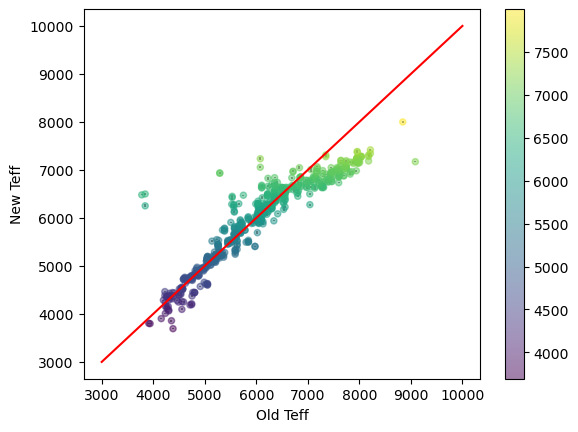

In [70]:
#new vs old Teff
fig, ax = plt.subplots()
x1 = np.linspace(3000, 10000)
ax.plot(x1, x1, 'r')
x = NewVsOld['Teff_old']
y = NewVsOld['Teff_new']
scatter = plt.scatter(x, y, alpha= 0.5, c = NewVsOld['Teff_new'], s=20)
plt.errorbar(x, y, yerr = NewVsOld['Teff_err_new'], fmt = 'none', color = 'gray', zorder=-1)
plt.colorbar(scatter)
ax.set_xlabel('Old Teff')
ax.set_ylabel('New Teff')


Text(0, 0.5, 'New logg')

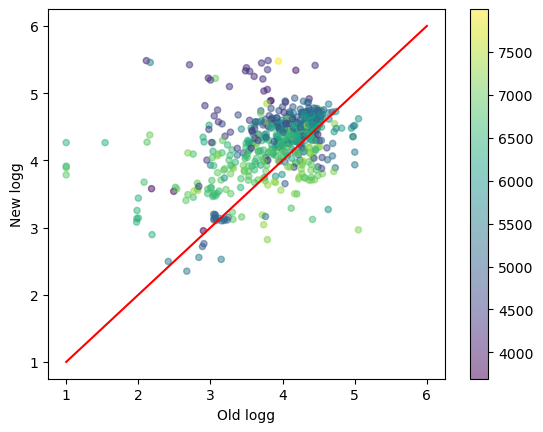

In [72]:
#new vs old logg
fig, ax = plt.subplots()
x1 = np.linspace(1, 6)
ax.plot(x1, x1,'r')
x = NewVsOld['logg_old']
y = NewVsOld['logg_new']
scatter = plt.scatter(x, y, c = NewVsOld['Teff_new'], s = 20, alpha = 0.5)
#plt.errorbar(x, y, yerr=NewVsOld['logg_err_new'], fmt="none", color='gray', zorder=-1)
#plt.errorbar(x, y, xerr=NewVsOld['logg_err_old'], fmt="none", color='gray', zorder=-1)
plt.colorbar(scatter)
ax.set_xlabel('Old logg')
ax.set_ylabel('New logg')

Text(0, 0.5, 'New Fe/H')

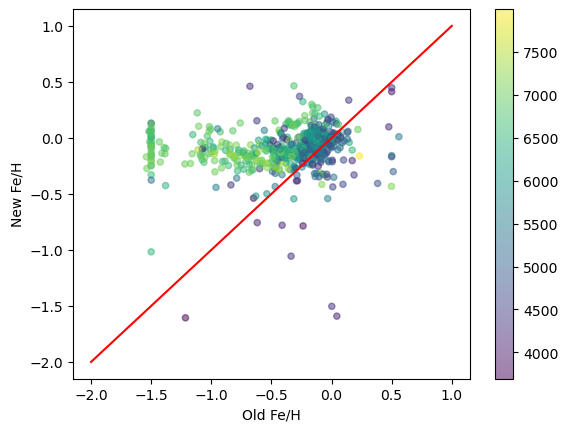

In [73]:
#new vs old Fe/H
fig, ax = plt.subplots()
x1 = np.linspace(-2, 1)
ax.plot(x1, x1,'r')
x = NewVsOld['[Fe/H]_old']
y = NewVsOld['[Fe/H]_new']
scatter = plt.scatter(x, y, c = NewVsOld['Teff_new'], alpha = 0.5, s = 20)
#plt.errorbar(x, y, yerr=NewVsOld['[Fe/H]_err_new'], fmt="none", color='gray', zorder =-1)
#plt.errorbar(x, y, xerr=NewVsOld['[Fe/H]_err_old'], fmt="none", color='gray', zorder =-1)
plt.colorbar(scatter)
ax.set_xlabel('Old Fe/H')
ax.set_ylabel('New Fe/H')

Text(0, 0.5, 'New RV')

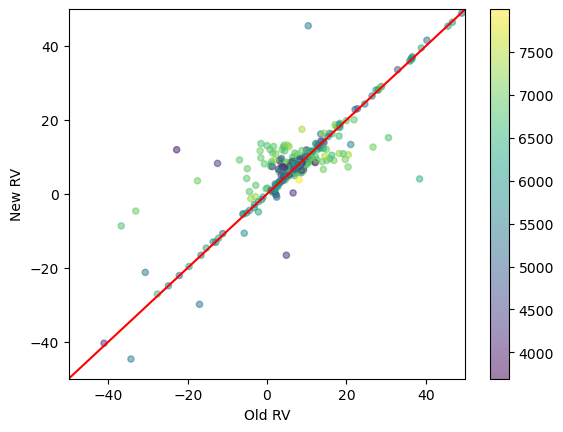

In [75]:
#new vs old RV
fig, ax = plt.subplots()
x1 = np.linspace(-500, 500)
ax.plot(x1, x1,'r')
x = NewVsOld['RV_old']
y = NewVsOld['RV_new']
scatter = plt.scatter(x, y, c = NewVsOld['Teff_new'], s = 20, alpha = 0.5)
ax.set_xlim(-50,50)
ax.set_ylim(-50,50)
#plt.errorbar(x, y, yerr=NewVsOld['RV_err_new'], fmt="none", color='gray', zorder = -1)
#plt.errorbar(x, y, xerr=NewVsOld['RV_err_old'], fmt="none", color='gray', zorder = -1)
plt.colorbar(scatter)
ax.set_xlabel('Old RV')
ax.set_ylabel('New RV')